In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [9]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()
conf.tree_depth = 12
conf.use_prenet = True
conf.epochs = 100
conf.learning_rate = 0.1
conf.n_trees = 1

x,y = ugly_sine(range = (0,30),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs,conf=conf)
run.fit(conf.epochs, learn)

# run.wavelets.prune(even_cutoff=False)

# run.recorder.plot_lr()

# run.recorder.plot_lr()

# from training import trainer
# train = trainer(xt,yt)

train: [0.27400751256231054, tensor(0.2740, device='cuda:0')]
valid: [0.3101242527817235, tensor(0.3101, device='cuda:0')]
train: [0.23468313644181438, tensor(0.2347, device='cuda:0')]
valid: [0.31171792926210345, tensor(0.3117, device='cuda:0')]
train: [0.19211475884736473, tensor(0.1921, device='cuda:0')]
valid: [0.3165409203731652, tensor(0.3165, device='cuda:0')]
train: [0.15831228512436596, tensor(0.1583, device='cuda:0')]
valid: [0.3231587265477036, tensor(0.3232, device='cuda:0')]
train: [0.13796715238201085, tensor(0.1380, device='cuda:0')]
valid: [0.3294951987989021, tensor(0.3295, device='cuda:0')]
train: [0.1208573384071464, tensor(0.1209, device='cuda:0')]
valid: [0.3201384110884233, tensor(0.3201, device='cuda:0')]
train: [0.11264822376308156, tensor(0.1126, device='cuda:0')]
valid: [0.2887610522183505, tensor(0.2888, device='cuda:0')]
train: [0.11094373731470819, tensor(0.1109, device='cuda:0')]
valid: [0.25370054533987335, tensor(0.2537, device='cuda:0')]
train: [0.10938

train: [0.024381361790557405, tensor(0.0244, device='cuda:0')]
valid: [0.27992453719630384, tensor(0.2799, device='cuda:0')]
train: [0.02381285980566224, tensor(0.0238, device='cuda:0')]
valid: [0.28444706309925427, tensor(0.2844, device='cuda:0')]
train: [0.023147842777309132, tensor(0.0231, device='cuda:0')]
valid: [0.2796863787101977, tensor(0.2797, device='cuda:0')]
train: [0.022535683503791468, tensor(0.0225, device='cuda:0')]
valid: [0.2688600077773585, tensor(0.2689, device='cuda:0')]
train: [0.022046048249771345, tensor(0.0220, device='cuda:0')]
valid: [0.255051901846221, tensor(0.2551, device='cuda:0')]
train: [0.021603370780375466, tensor(0.0216, device='cuda:0')]
valid: [0.24107579028967654, tensor(0.2411, device='cuda:0')]
train: [0.021151457259904093, tensor(0.0212, device='cuda:0')]
valid: [0.22866366126320578, tensor(0.2287, device='cuda:0')]
train: [0.020712372082382885, tensor(0.0207, device='cuda:0')]
valid: [0.2181301550431685, tensor(0.2181, device='cuda:0')]
train:

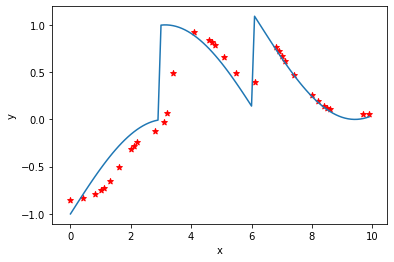

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()
# plt.scatter(xx, yy, marker='^', label='ground truth',axes=ax)

plt.plot(x, y)
plt.scatter(xx, zz, marker='*',color='r')
# for j in range(len(run.wavelets.wavelet_pred_list)//30):
#     plt.scatter(xx, run.wavelets.wavelet_pred_list[30*j].cpu().numpy(), marker='*',label=run.wavelets.psi.cutoff_value_list[j],axes=ax)

# plt.title('wavelet approx.')

# ax.legend(["Ground Truth","5","300","450","600","750","900"])
# plt.show()


#learning rate 0.03
#tree depth 14

In [8]:
import pandas as pd
pred_list = [i.tolist() for i in run.wavelets.wavelet_pred_list]
pred_df = pd.DataFrame(pred_list)
loss_df = pd.DataFrame(run.wavelets.wavelet_loss)
cutoff_df = pd.DataFrame(run.wavelets.psi.cutoff_value_list)

pred_df.to_csv('wav_pred.csv',index=False)
loss_df.to_csv('wav_loss.csv',index=False)
cutoff_df.to_csv('wav_cutoff.csv',index=False)

AttributeError: 'Runner' object has no attribute 'wavelet_pred_list'

In [ ]:
loss_df

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
run.recorder.plot_loss()

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("no. of wavelets/5")
ax.set_ylabel("loss")
loss_df.plot(ax=ax)

In [ ]:
(((pred_df.T[198]-yy)**2).sum())/100

In [ ]:
12//10